# Insights from text analysis

This section summarised the interesting insights from analysising the text data. The most interesting insights were gained from answering the question: can we gain an insight into how quickly a video will begin to trend from the text attributes of the dataset?

However we should first ask: why do we care how long it takes for my video to begin trending?

The answer to this is: because the longer it takes, the less likey it is that your video will trend at all. This is apprent just by looking at the number of videos which trend as a function of time taken until the video goes trending:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

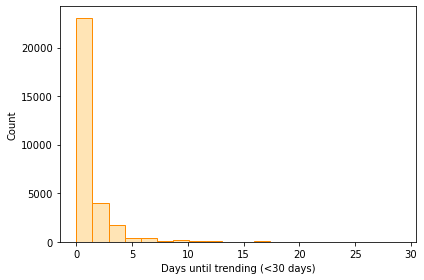

Number videos trending after 0 days: 2065
Number videos trending after 1 days: 21015
Number videos trending after 2 days: 3991
Number videos trending after 3 days: 1116
Number videos trending after 4 days: 583
Number videos trending after 5 days: 362
Number videos trending after 6 days: 212
Number videos trending after 7 days: 158
Number videos trending after 8 days: 97
Number videos trending after 9 days: 89


In [4]:
data = pd.read_csv('../../data/data.csv') #load a cleaned and processed dataset. 
data = data.drop_duplicates(subset='video_id',keep='first').reset_index(drop=True) #only take initial instances
#Visualise the distribution of times taken to begin trending 

fig = plt.figure()
times = data['days_till_trending']
times_truncated = times.values[np.where(times<30)]
plt.hist(times_truncated,facecolor='moccasin',bins=20,ec='darkorange')
plt.xlabel('Days until trending (<30 days)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

for i in range(10):
    days = data[data['days_till_trending']==i]
    print('Number videos trending after '+str(i)+' days:', days.shape[0])

We can can see that beyond 1 day, the number of videos which go trending decreases rapidly. This shows that __the probability of your video trending falls as time progresses past 1 day__. 

### What does the text tell us about trending times?

We developed a method to identify sets of words which may help a video to trend quickly (see Task 2 of the section 'Text analysis of YouTube dataset' notebook in the Research directory, for details). This method was applied to the titles of videos in the entertainment category for videos in the GB, US and CA data sets. 

We identified a set of 30 words which occur more frequently in the titles of videos that trend on the same day of posting, compared to in the titles of videos which do not trend on the same day of posting. The set of words is:

'2018', 'episode', 'season', 'promo', '2017', 'live', 'idol', 'american', 'voice', 'finale', 'flash', 'trailer', 'girls', 'tlmep', 'video', 'iphone', 'super', 'recap', 'monologue', 'paul', 'logan', 'chicken', 'official', 'america', 'annie', 'hayden', 'show', 'series', 'extended', 'love'


We can idenfity some known TV shows and people in this set:
 - American Idol (TV show)
 - Logan Paul (Youtuber)
 - Annie & Hayden (likely relates to two, famous US child actors with millions of instagram followers, who 'broke-up' in 2018).
 
And words which relate to TV and film in general:
 - Episode
 - Season
 - Promo 
 - Official 
 - Trailer 
 - Series
 - Video

1. From this data set it seems that in the Entertainment category, __promo videos and trailers__ trend on the day they are posted.
2. The appreance of 'Official' suggests that __people look for authenticity__ with their videos. You can imagine this would occur in phrases such as 'Official Trailer' and 'Official Promo'.
3. The appearance of '2018' and '2017' suggests that __people look for the most current version__ of specific videos.
3. It suggests that American idol is the most popular show in the category and the audience engages with new videos on the day of posting.
4. Celebrities may trend quickly. Logan Paul is often known to be controversial, this suggests that __controversy could cause videos to begin trending faster__. Also a google search of Annie Hayden brings up multiple hits relating to the break-up of the two US actors mentioned above. This suggests that __celebrity 'gossip' also trends quickly__.
5. __iPhone announcments trend quickly__, which may be expected since Apple is known to have a dedicated customer base. The occurance of 'iphone' could relate to the announcement of the release of the iPhone XS, XS Max and XR in 2018. 

### Conclusion

 - Including the word 'official' may make your videos trend faster, however you may not have the right to do this if you are not really the official publisher!
 - Try including the the year, this is most likely relavent to people who publish compliation videos. For example, 'Game compilations 2018' may trend faster than simply 'Game compilations'.
 - There is a suggestion that people enjoy celebrity gossip. Try covering celebrities if you want your videos to trend quickly.
 - Talk about iPhones: iPhone was a commonly occuring word in fast trending videos. It is unlikely all of these videos are official apple announcements, so some must be other people discussing iPhone, and these videos also appear to trend quickly. 
 
__Note__, we do expect that there will be other external influences which will be powerful factors determining how quickly a video trends on Youtube. An obvious factor is whether or not a topic related to a video is already trending on social media. Because we expect external factors to be important, the insights from the text analysis are not given; including 'official 2018' in your video title does not guarantee that your video will trend immediately. 